In [2]:
#Numerical Accuracy & speed
import sys
'''
if |x|>max, |x|=inf #overflow
if 0<|x|<min, |x|=0 #underflow
'''
print(sys.float_info.max,'is maximum as possible for computing')
print(sys.float_info.min,'is minimum as possible for computing')

1.7976931348623157e+308 is maximum as possible for computing
2.2250738585072014e-308 is minimum as possible for computing


In [4]:
#Intrinsic uncertainty
import numpy as np
eps=sys.float_info.epsilon
x=3.3
if (x-3.3)<eps: print(True)
x=x+eps
if (x-3.3)<eps: print(True)

x=1;y=1+(1e-14)*np.sqrt(2)
print((1e14)*(y-x))
print(np.sqrt(2.0))
print(eps)

True
True
1.4210854715202004
1.4142135623730951
2.220446049250313e-16


2.220446049250313e-16

In [ ]:
from math import sin, cos

for i in range(20):
  h=10**(-i)
  f=(sin(1+h)-sin(1))
  print(f)
print("correct result =",cos(1))

0.0678264420177852
0.04973637525353891
0.00536085981011869
0.0005398814803603269
5.402602314186211e-05
5.4029809850586474e-06
5.403018851213304e-07
5.403022640404487e-08
5.403023028982545e-09
5.403023584094058e-10
5.403022473871033e-11
5.403011371640787e-12
5.403455460850637e-13
5.395683899678261e-14
5.440092820663267e-15
5.551115123125783e-16
0.0
0.0
0.0
0.0
correct result = 0.5403023058681398


In [ ]:
#Numerical cost
from time import time

a=np.float(0.0)

start=time()
for i in range(1000000): a=sin(a)
end=time()

print(end-start)

0.12430572509765625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
from time import time
import numpy as np
N=300
A=np.random.rand(N,N)
B=np.random.rand(N,N)
C=np.zeros((N,N))

start=time()

for i in range(N):
  for j in range(N):
    for k in range(N):
      C[i,j]+=A[i,k]*B[k,j]
end=time()
print(end-start)

22.695642232894897


In [ ]:
N=300
A=np.random.rand(N,N)
B=np.random.rand(N,N)
C=np.zeros((N,N))

start=time()

for i in range(N):
  for j in range(N):
    C[i,j]+=np.dot(A[i,:],B[:,j])
end=time()
print(end-start)

0.2590923309326172


In [ ]:
N=300
A=np.random.rand(N,N)
B=np.random.rand(N,N)

start=time()
C=np.dot(A,B)
end=time()
print(end-start)

0.007811784744262695


In [ ]:
#Numerical integration& derivative
#scipy.integrate.*quad

from scipy.integrate import quad
x2=lambda x:x**2
res,err=quad(x2,0,4)
print(res, err)

21.333333333333336 2.368475785867001e-13


In [ ]:
#Multiple integration
from scipy.integrate import quad
import numpy as np

def func(t,n,x):
  return np.exp(-x*t)/t**n

def expint(n,x):
  return quad(func, 1, np.inf, args=(n,x))[0]

quad(lambda x: expint(3,x),0,np.inf)
#result 1/n

(0.33333333325010883, 2.8604069921197956e-09)

In [ ]:
#nquad
from scipy.integrate import nquad
import numpy as np

def func(t,x,n):  #integrate ftn in order of variable
  return np.exp(-x*t)/t**n

nquad(func,[[1,np.inf],[0,np.inf]],args=(3,))

(0.33333333325010883, 1.3888461883425516e-08)

In [ ]:
#dblquad
from scipy.integrate import dblquad
import numpy as np

def func(t,x,n):  #integrate ftn in order of variable
  return np.exp(-x*t)/t**n

dblquad(func,0,np.inf,0,np.inf,args=(3,))
#Note that the outer is the fitst

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-p

(5.2493816044655424e+20, 2.0946598578610646e+22)

In [ ]:
#Example
dblquad(lambda x,y:x*y,0,0.5,lambda x:0,
                             lambda x:1-2*x)

def bound(y):
  return [0.,1.-2*y]

nquad(lambda x,y:x*y,[bound,[0,0.5]])

(0.010416666666666668, 4.101620128472366e-16)

In [ ]:
#Trapezoidal
'''
Approximation Error ~O(h**2)
=1/12(f'(a)-f'(b))h**2

Roundinge error becomes important when N~O(eps^-1/2)~1e8
eps*(integration f)~approximation error
'''
def I_trapez(f,a,b,n):
  x=np.linspace(a,b,n+1)
  sum=0.5*(f(a)+f(b))
  sum+=np.sum(f(x[1:-2]))
  return sum*(x[1]-x[0])


In [ ]:
#Simpson's rule
'''
sum of quadratics, so even N slices are needed
Approximation Error ~O(h**4)

Roundinge error becomes important when N~O(eps^-1/4)~1e8
eps*(integration f)~approximation error

'''
def I_simps(f,a,b,n):
  x=np.linspace(a,b,n+1)
  sum=(f(a)+f(b))
  sum+=4.*np.sum(f(x[1::2]))
  sum+=2.*np.sum(f(x[2:-2:2]))
  return sum*(x[1]-x[0])/3

In [ ]:
#Adaptive Simpson
'''
e=|I_simps(f,a,b,2)-I_simps(f,a,(a+b)/2,2)-I_simps(f,(a+b)/2,b,2)|
if e>eps: bisect the interval
if e<eps: that is good interval
This method has a problem that it is not valid of the sharp ftn
'''
def ftn(x): return np.exp(-x*x)

def bisection(f,a,b):
  c=b
  b/=2
  return I_simps(f,a,b)+I_simps(f,b,c)

a=0 ; b=2
exactValue=##

eps=sys.float_info.epsilon*1e14  #1e-2
print(eps)

I1=I_simps(ftn,a,b,2)
I21=I_simps(ftn,a,b/2,2)
I22=I_simps(ftn,b/2,2,2)
e= abs(I1-(I21+I22))/10
if e>eps:
  I1=I21
  I21=bisection(ftn,a,b/2)
  I_simps(ftn,a,b/4,2)+I_simps(ftn,b/4,2,2)
  e=abs(I1-I2)/10


Text(0, 0.5, 'Error')

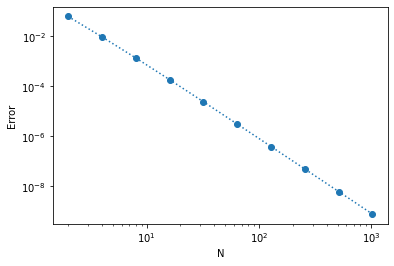

In [ ]:
#Gaussian Quadrature
'''
Approximation of an integrand with a degree M-1 polynomial, let p_M-1(x)= degree M-1 pol.  M unknowns
p_M-1(x)=sum[f(x_k)*product{(x-x_j)/(x_k-x_j),x_j=1,M if j!=k},x_k=1 to M]

I=integral(p_M-1(x))
'''
from scipy.integrate import fixed_quad
import numpy as np
import matplotlib.pyplot as plt
f=lambda x:np.sqrt(1-x**2)
g=np.vectorize(lambda i: fixed_quad(f,-1,1,n=2**(i+1))[0])
y=np.fromfunction(g,(10,))
plt.loglog(2**np.arange(1,11),np.abs(y-np.pi*0.5),"o:")
plt.xlabel('N')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

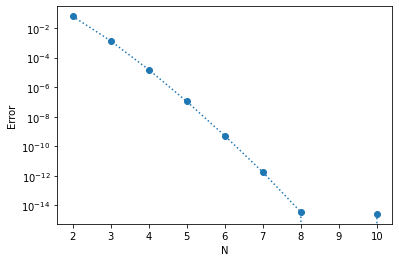

In [ ]:
f=lambda x:np.sin(x)
g=np.vectorize(lambda i: fixed_quad(f,0,np.pi,n=i+2)[0])
y=np.fromfunction(g,(9,))
plt.semilogy(np.arange(2,11),np.abs(y-2),"o:")
plt.xlabel('N')
plt.ylabel('Error')

In [ ]:
#Improper Integral  Midpoint rule
'''
Generally, integration is transposed integrablly
'''
import numpy as np
from scipy.integrate import quad
def I_midpoint(f,a,b,n):
  h=(b-a)/n
  x=np.linspace(a,b,2*n+1)
  x=x[1:-1:2]
  return(h*np.sum(f(x)))

f=lambda x: 1./np.sqrt(np.sin(x))
g=lambda x: 1./np.sqrt(np.sin(x))-1./np.sqrt(x)

I0=quad(f,0,1)[0]
I1=quad(g,0,1)[0] +2.
I2=I_midpoint(f,0,1,1000)
I3=I_midpoint(g,0,1,1000)+2.

print("quad = %.4e"%I0)
print("quad with correction =%.4e"%I1)
print("midpoint = %.4e"%I2)
print("midpoint with correction =%.4e"%I3)


quad = 2.0348e+00
quad with correction =2.0348e+00
midpoint = 2.0157e+00
midpoint with correction =2.0348e+00


In [ ]:
#Numerical derivative
from scipy.misc import derivative
import numpy as np

def f(x):
  return x**3+x**2
derivative(f,1.,dx=1.e-6)
# derivative(ftn,x0,dx=1.0,n=1,args=(),order=3)

4.999999999921734

In [ ]:
#Linear Equations
import numpy as np
a=np.array([[3,1],[1,2]])
b=np.array([9,8])
x=np.linalg.solve(a,b)
print(x)

A=np.array([[1,3,5],[2,5,1],[2,3,8]])
Ainv=np.linalg.inv(A)   #scipy.linalg.inv(A)
print(Ainv,'\t',A.dot(Ainv))
import scipy
y=scipy.linalg.solve(a,b,assume_a='gen')
# assume_a= 'gen' or 'sym' or 'her' or 'pos'
print(y)



[2. 3.]
[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]
[2. 3.]


In [ ]:
#Eigen Problem
import numpy as np
from scipy import linalg

A=np.array([[1,3,5],[2,5,1],[2,3,8]])
la,v=linalg.eig(A) #linalg.eigh(A)  when A is her, symm etc
l1,l2,l3=la
print( l1, l2,   l3)

print(v[:,0],v[:,1], v[:,2])

print(np.sum(abs(v**2),axis=0)) #sum over row components

v1=np.array(v[:,0])
print(linalg.norm(A.dot(v1)-l1*v1))

(10.5540455960959+0j) (-0.5873064038673474+0j) (4.03326080777145+0j)
[-0.51686204 -0.32845853 -0.79054957] [-0.94195144  0.31778071  0.10836468] [ 0.11527992 -0.81936883  0.56155611]
[1. 1. 1.]
4.189529226675416e-15


In [ ]:
#Nonlinear Equations
import numpy as np
from scipy.optimize import brentq, newton

def f(x): return x**3-3.*x+1.

x=np.linspace(-3,3,100)
print(brentq(f,-3,0),brentq(f,0,1),brentq(f,1,3))

print(newton(f,-3),newton(f,0),newton(f,3))

-1.8793852415718166 0.3472963553337031 1.532088886237956
-1.8793852415718166 0.34729635533385395 1.5320888862379578


In [ ]:
from scipy.optimize import root, fsolve

def f(x): return [x[1]-3.*x[0]*(x[0]+1.)*(x[0]-1.),
                  0.25*x[0]**2+x[1]**2-1.]

sol=root(f,(0.5,0.5))
print(sol.x)

print(fsolve(f,(0.5,0.5)))

[1.11694147 0.82952422]
[1.11694147 0.82952422]


In [ ]:
#Relaxation method
from math import exp, log, sqrt
x=1
for k in range(10):
  x=2.-exp(-x)
  #print(x)
'''
if x converges, x is the sol
it does not work for all cases

Termination condition
eps'~(x-x')/(1-1/f'(x))

eps''~(x'-x'')**2/(2x'-x-x'')
'''
x=1./2.
y=0.5
for k in range(5):
  x=exp(1-x*x)
  y=sqrt(1.-log(y))
  print('x=%.4e'%x)
  print('y=%.4e'%y)

x=2.1170e+00
y=1.3012e+00
x=3.0755e-02
y=8.5832e-01
x=2.7157e+00
y=1.0737e+00
x=1.7035e-03
y=9.6380e-01
x=2.7183e+00
y=1.0183e+00


(0.0, 2.0)

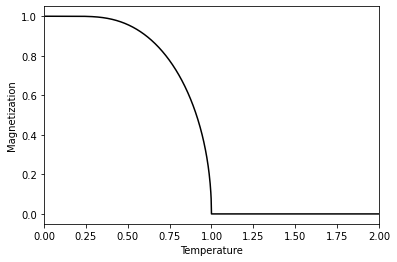

In [ ]:
#Exercise
import numpy as np
import matplotlib.pyplot as plt

Tmax=2.
points=1000
accuracy=1.e-6

temp=np.linspace(0.01,Tmax,points)
m=np.zeros_like(temp)

for i,T in enumerate(temp):
  m1=1.
  error=1.
  while error > accuracy:
    m1,m2=np.tanh(m1/T),m1   #fixed point
    error=abs((m1-m2)/(1.-T*np.cosh(m2/T)**2))  #eps'
  m[i]=m1

plt.plot(temp,m,'k-')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.xlim([0,2])

[-2.64665241 -2.09229572 -1.83178082 -1.65839002 -1.52752443 -1.42192587
 -1.33307963 -1.25615281 -1.1881364  -1.12702903 -1.07143168 -1.02032776
 -0.97295507 -0.92872736 -0.88718386 -0.84795576 -0.81074313 -0.77529871
 -0.74141614 -0.70892136 -0.67766607 -0.64752284 -0.61838131 -0.59014516
 -0.56272977 -0.53606034 -0.51007034 -0.48470028 -0.45989668 -0.43561122
 -0.41180003 -0.3884231  -0.36544375 -0.34282825 -0.32054541 -0.29856626
 -0.27686382 -0.25541281 -0.23418947 -0.21317135 -0.19233717 -0.17166666
 -0.15114044 -0.13073985 -0.11044692 -0.09024419 -0.07011467 -0.05004173
 -0.030009   -0.01000033  0.01000033  0.030009    0.05004173  0.07011467
  0.09024419  0.11044692  0.13073985  0.15114044  0.17166666  0.19233717
  0.21317135  0.23418947  0.25541281  0.27686382  0.29856626  0.32054541
  0.34282825  0.36544375  0.3884231   0.41180003  0.43561122  0.45989668
  0.48470028  0.51007034  0.53606034  0.56272977  0.59014516  0.61838131
  0.64752284  0.67766607  0.70892136  0.74141614  0

Text(0, 0.5, 'arctanh(u)')

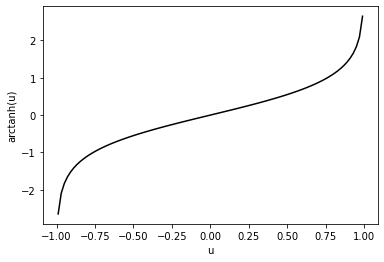

In [ ]:
#Binary search
import numpy as np
import matplotlib.pyplot as plt
#Newton method
'''
It is easy if we know the deivative of f
Convergence is quadratic, but not always converge
'''

accuracy=1.e-12

def arctanh(u):
  x=0.
  delta=1.
  while abs(delta)>accuracy:
    delta=(np.tanh(x)-u)*np.cosh(x)**2
    x-=delta
  return x

upts = np.linspace(-0.99,0.99,100)
xpts=np.zeros_like(upts)

for i,u in enumerate(upts):
  xpts[i]=arctanh(u)

plt.plot(upts,xpts,'k-')
plt.xlabel('u')
plt.ylabel('arctanh(u)')

In [ ]:
#Secant method
'''
In Newton's method, the derivative should be linearly approximate
'''
#Newton's method N dim
'''
let x' be the sol of n-eqns f
    x be a point in vincinity of x'
then we can compute
      d_if/dx_j=f(x)
'''


     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

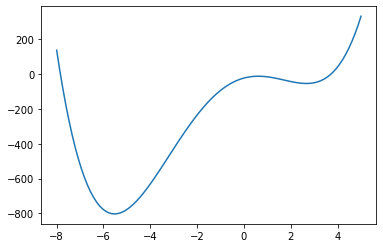

In [ ]:
#Minimize
from scipy import optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**4 + 3.*(x-2.)**3 - 15.*x**2 + 1.

x=np.linspace(-8,5,100)
plt.plot(x,f(x))

opt.minimize_scalar(f,method='Brent')

#opt.minimize_scalar(f,method='bounded',bounds=[0,6])


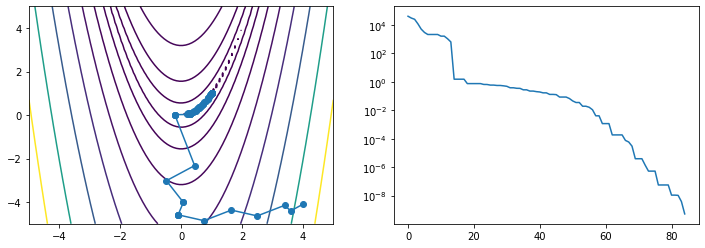

In [ ]:
#Minimize; Rosenbrock function
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y=np.meshgrid(x,y)
Z=rosen(np.vstack([X.ravel(),Y.ravel()])).reshape((100,100))

def reporter(p):
  global ps
  ps.append(p)

x0=np.array([4,-4.1])

ps=[x0]
minimize(rosen,x0,method='nelder-mead',callback=reporter)  #method='BFGS' or method= 'Neoton-CG', jac=rosen_der, hess=rosen_hess

ps=np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X,Y,Z,np.arange(10)**5)
plt.plot(ps[:,0],ps[:,1],'-o')
plt.subplot(122)
plt.semilogy(range(len(ps)),rosen(ps.T))

In [ ]:
#Golden Ratio Rule
import numpy as np

sigma=1.0
accuracy=1.e-6
zinv=2./(1.+np.sqrt(5.))

f=lambda r : (sigma/r)**6-np.exp(-r/sigma)

x1=0.1*sigma
x4=sigma*10.
x2=x4-(x4-x1)*zinv
x3=x1+(x4-x1)*zinv

f1,f2,f3,f4=f(x1), f(x2), f(x3), f(x4)

while (x4-x1)>accuracy:
  if f2<f3:
    x4, f4= x3, f3
    x3, f3= x2, f2
    x2= x4-(x4-x1)*zinv
    f2=f(x2)
  else:
    x1, f1= x2, f2
    x2, f2= x3, f3
    x3= x1+(x4-x1)*zinv
    f3=f(x3)

print('The minimum falls at',0.5*(x1+x4))


The minimum falls at 1.6305160671748755


[2.73073773 1.54924613]


<function matplotlib.pyplot.legend(*args, **kwargs)>

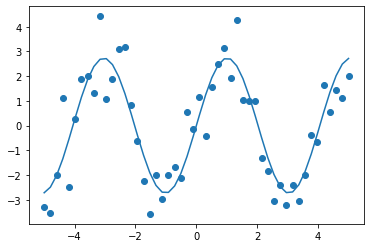

In [ ]:
#Curve fitting
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plot

#data
x_data=np.linspace(-5,5,num=50)
y_data= 2.9* np.sin(1.5*x_data)+np.random.normal(size=50)

#Curve fit & plot
def test_func(x,a,b):
  return a*np.sin(b*x)

params, params_covariance=optimize.curve_fit(test_func,x_data,y_data,p0=[2,2])

print(params)

plt.scatter(x_data,y_data,label='Data')
plt.plot(x_data,test_func(x_data,params[0],params[1]),label='Fitted function')
plt.legend

In [ ]:
#Fourier Transform
'''
For a ftn defined on [0,L), f(x)=sum(a_k*exp(2*pi*i*k*x/L)){-inf,inf}
a_k=1/L integral(f(x)*exp(-2*pi*i*k*x/L)dx){0,L}
N-Sample point x_n-(n/N)L  n=1,2,... N-1
Trapezoidal rule, a_k=(1/L)(L/N)[1/2*f(0)+1/2*f(L)+sum(f(x_n)*exp(-2*pi*i*k*x_n/L)){1,N-1}]
By periodic, a_k=(1/N)sum(f(x_n)*exp(-2*pi*i*k*n/L)){0,N-1}

scipy.fftpack.fft()    c_k=sum(y_n*exp(-2*pi*i*k*n/L)){0,N-1}
scipy.fftpack.ifft()    y_n=(1/N)sum(y_n*exp(-2*pi*i*k*n/L)){0,N-1}
'''
#If y_n is real
import numpy as np

def dft(y):
  N=len(y)
  c=np.zeros(N//2+1,complex)
  for k in range(N//2+1):
    for n in range(N):
      c[k]+=y[n]*np.exp(-2.j*np.pi*k*n/N)
  return c
'''
c_(N-r)=c_r*
scipy.fftpack.rff()
'''

In [ ]:
#DFT
import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/My Drive/python'

/content/drive/My Drive/python


In [ ]:
y=np.loadtxt("pitch.txt")

In [ ]:
def dft(y):
  N=len(y)
  c=np.zeros(N//2+1,complex)
  for k in range(N//2+1):
    for n in range(N):
      c[k]+=y[n]*np.exp(-2.j*np.pi*k*n/N)
  return c

(0.0, 500.0)

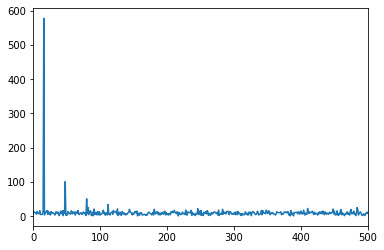

In [ ]:
c=dft(y)
plt.plot(np.abs(c))
plt.xlim(0,500)

In [ ]:
'''
Discrete FT: operation counts N**2/2
fft reduce the complexity to O(Nlog2(N)) ; requirement: N=2**m
'''

Text(0, 0.5, 'Power')

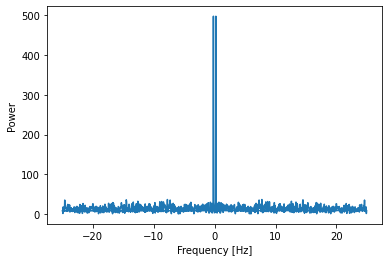

In [ ]:
#High frequency filter
import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
time_step=0.02
period=5.
time_vec=np.arange(0,20,time_step)
sig=(np.sin(2.*np.pi/period*time_vec)+0.5*np.random.randn(time_vec.size))

#perform fft
sig_fft=fftpack.fft(sig)
power=np.abs(sig_fft)
sample_freq=fftpack.fftfreq(sig.size,d=time_step)

#plot
plt.plot(sample_freq,power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

0.2


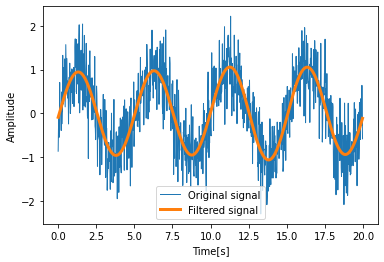

In [ ]:
#Find peak
pos_mask=np.where(sample_freq>0)
freqs=sample_freq[pos_mask]
peak_freqs=freqs[power[pos_mask].argmax()]
print(peak_freqs)

#Filter
high_freq_fft=sig_fft.copy()
high_freq_fft[np.abs(sample_freq)>peak_freqs]=0

#Perform ifft
filtered_sig=fftpack.ifft(high_freq_fft)

#Plot
plt.plot(time_vec,sig,lw=1,label='Original signal')
plt.plot(time_vec,filtered_sig.real,lw=3,label='Filtered signal')
plt.xlabel("Time[s]")
plt.ylabel("Amplitude")
plt.legend()

In [ ]:
#ODE
'''
solve ODE: dy/dt=f(t,y)
1)scipy.integrate.ode(), odeint()
2)solve_ivp(f,t_span,y0,method='RK45',...)
f: a ftn f(t,y)
t_span=(t0,t_f)
y0: an initial point
method='RK45' (default)
'''
from scipy.integrate import solve_ivp
def f(t,y): return -0.5*y
sol=solve_ivp(f,[0,10],(2,))
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11488132,  1.26369452,  3.06074656,  4.81637262,
        6.57504937,  8.33467262, 10.        ])
 t_events: None
        y: array([[2.        , 1.88835583, 1.0632438 , 0.43316531, 0.18014905,
        0.07480841, 0.03105019, 0.01350782]])
 y_events: None


In [ ]:
#odeint()
from scipy.integrate import odeint
import numpy as np
t=np.arange(0,11,1)
sol2=odeint(f,(2,),t)
print(sol2)

[[  2.        ]
 [  1.74999999]
 [  0.99999999]
 [ -0.25000001]
 [ -2.00000001]
 [ -4.25000001]
 [ -7.00000001]
 [-10.25000001]
 [-14.00000001]
 [-18.25000001]
 [-23.00000001]]


(0.0, 6.0)

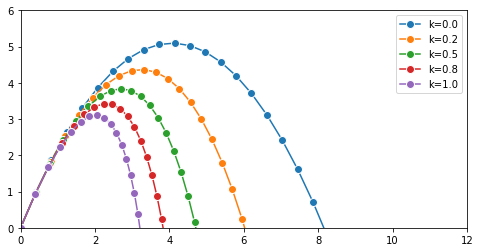

In [ ]:
#Example
'''
the equation of motion: X''=-k/m*X'-g(y^)  ;X=(x,y)
dY/dt=f(t,Y) then Y=([x],[y],[v_x],[v_y]) since the second order ODE
f(t,y)=([v_x],[v_y],[-k/m*v_x],[-k/m*v_y-g]) like Hamilton's EOM
'''
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m=1.
k=1.
g=9.81

#The initial position (0,0)
y0=np.zeros(4)
y0[2]=4.  #initial v_x
y0[3]=10. #initial v_y

def f(y,t,k):
  v=y[2:]
  dv=-k/m*v
  dv[1]-=g
  return np.r_[v,dv]

fig=plt.figure(figsize=(8,4))
ax=plt.gca()

t=np.linspace(0.,3.,30)

for k in np.linspace(0.,1.,5):
  y=odeint(f,y0,t,args=(k,))
  ax.plot(y[:,0],y[:,1],'o-',
          mew=1,ms=8,mec='w',
          label=f'k={k:.1f}')
ax.legend()
ax.set_xlim(0,12)
ax.set_ylim(0,6)

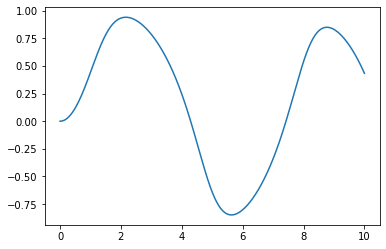

In [ ]:
#Euler's method
'''
To solve x'=f(x,t)
x(t+h)=x(t)+hf(x,t)
Cumulative Error: eps=sum((1/2)*h**2*x"(t_k)){k}
=(1/2)*h*sum(h*df/dt|t_k){k}~(1/2)*h*integral((df/dt)dt){a,b}=O(h)
high error
'''
import numpy as np
from math import sin
import matplotlib.pyplot as plt

def f(x,t):
  return -x**3+sin(t)

ts=np.linspace(0,10,1000)
h=ts[1]-ts[0]
x=0.0

xs=np.zeros_like(ts)
#Euler's method
for i,t in enumerate(ts):
  xs[i]=x
  x+=h*f(x,t)
plt.plot(ts,xs)

In [ ]:
#Runge-Kutta (RK2)
'''
x(t+h)=x(t+1/2)+h/2f(x(t+h/2),t+h/2)+...
x(t)=x(t+1/2)-h/2f(x(t+h/2),t+h/2)+...

x(t+h)=x(t)+h*f(x(t+h/2),t+h/2)
Cumulative Error: eps=O(h**2)& step error:O(h**3)

k1=h*f(x,t)
k2=h*f(x+k1/2,t+h/2)
x(t+h)=x(t)+k2   #Euler's method
'''

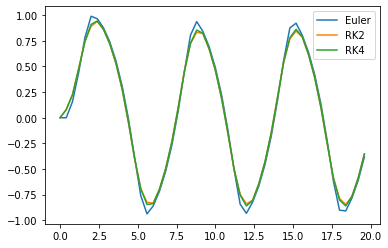

In [ ]:
#RK4
'''
k1=h*f(x,t)
k2=h*f(x+k1/2,t+h/2)
k3=h*f(x+k2/2,t+h/2)
k2=h*f(x+k3,t+h)
x(t+h)=x(t)+1/6(k1+2*k2+2*k3+k4)
'''
import numpy as np
import matplotlib.pyplot as plt
def f(x,t):
  return -x**3 +np.sin(t)

def Euler(f,x,t,h):
  return x+h*f(x,t)

def RK2(f,x,t,h):
  k1=h*f(x,t)
  k2=h*f(x+0.5*k1,t+0.5*h)
  return x+k2

def RK4(f,x,t,h):
  k1=h*f(x,t)
  k2=h*f(x+0.5*k1,t+0.5*h)
  k3=h*f(x+0.5*k2,t+0.5*h)
  k4=h*f(x+k3,t+h)
  return x+(k1+2.*k2+2.*k3+k4)/6.

N=50
t=np.arange(0,20.,20./N)
h=t[1]-t[0]
x1=np.zeros_like(t)
x2=np.zeros_like(t)
x4=np.zeros_like(t)

for i in range(t.size-1):
  x1[i+1]=Euler(f,x1[i],t[i],h)
  x2[i+1]=RK2(f,x1[i],t[i],h)
  x4[i+1]=RK4(f,x1[i],t[i],h)

plt.plot(t,x1,label='Euler')
plt.plot(t,x2,label='RK2')
plt.plot(t,x4,label='RK4')
plt.legend()

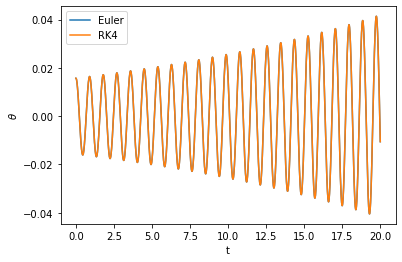

In [ ]:
#Disadvantage of Euler's method RK
import numpy as np
import matplotlib.pyplot as plt
g=9.81; l=0.2
def f(s,t):
  theta,omega=s
  ftheta=omega
  fomega=-(g/l)*np.sin(theta)
  return np.array([ftheta,fomega])

def Euler(f,x,t,h):
  return x+h*f(x,t)

def RK4(f,x,t,h):
  k1=h*f(x,t)
  k2=h*f(x+0.5*k1,t+0.5*h)
  k3=h*f(x+0.5*k2,t+0.5*h)
  k4=h*f(x+k3,t+h)
  return x+(k1+2.*k2+2.*k3+k4)/6.

N=50
t=np.arange(0,20.,20./N)
h=t[1]-t[0]
x1=np.zeros_like(t)
x2=np.zeros_like(t)
x4=np.zeros_like(t)
N=10000
Tmax=20.
t=np.linspace(0,Tmax,N)
s=np.zeros((N,2))
s[0,0]=np.pi/200.
s2=np.zeros((N,2))
s2[0,0]=np.pi/200.

h=t[1]-t[0]

for i in range(N-1):
  s[i+1]=Euler(f,s[i],t[i],h)
  s2[i+1]=RK4(f,s[i],t[i],h)

plt.plot(t,s[:,0],label='Euler')
plt.plot(t,s2[:,0],label='RK4')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.legend()
'''
For nonlinear case, these method are too dangerous to use it
The reason is why they violate time-reversal & translation symmetry
'''

In [ ]:
#Leap frog
m=1
def LeapFrog(f,x,xm,t,h):
  x1=x+h*f(xm,t+0.5*h)
  xm1=xm+h*f(x1,t+h)
  return x1,xm1

N=1000
Tmax=10,
t=np.linspace(0,Tmax,N)
s=np.zeros((N,2))
s[0,0]=np.pi/5.
h=t[1]-t[0]

sm=np.zeros_like(s)
sm[0]=RK4(f,s[0],t[0],0.5*h)

for i in range(N-1):
  s[i+1],sm[i+1]=LeapFrog(f,s[i],sm[i],t[i],h)
E=0.5*m*(l**2)*s[:,1]**2+m*g*l*(np.cos(s[0,0])-np.cos(s[:,0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sin
  


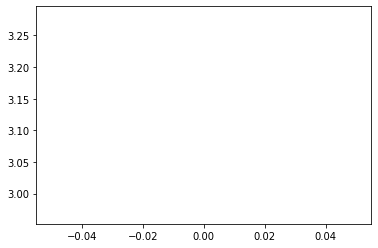

In [ ]:
#Bulirsch- Stoer methods
import numpy as np
import matplotlib.pyplot as plt
g=9.81; l=0.1; theta0=179.*np.pi/180.

a=0.; b=10.; N=100
H=(b-a)/N
delta=1e-8

def f(r):
  theta=r[0]
  omega=r[1]
  ftheta=omega
  fomega=-(g/l)*np.sin(theta)
  return np.array([ftheta,fomega])

tpoints=np.arange(a,b,H)
thetapoints=[]
r=np.array([theta0,0.],float)

for t in tpoints:
  thetapoints.append(r[0])

  n=1
  r1=r+0.5*H*f(r)
  r2= r+H*f(r1)

  R1=np.empty([1,2])
  R1[0]=0.5*(r1+r2+0.5*H*f(r2))

  error=2*H*delta
  while error>H*delta:
    n+=1
    h=H/n

    r1=r+0.5*h*f(r)
    r2=r+h*f(r1)
    for i in range(n-1):
      r1+=h*f(r2)
      r2+=h*f(r1)

    R2=R1
    R1=np.empty([n,2])
    R1[0]=0.5*(r1+r2+0.5*h*f(r2))
    for m in range(1,n):
      epsilon=(R1[m-1]-R2[m-1])/((n/(n-1))**(2.*m)-1.)
      R1[m]=R1[m-1]+epsilon
    error=abs(epsilon[0])

    r=R1[n-1]

plt.plot(tpoints,thetapoints)
plt.plot(tpoints,thetapoints,"b")

(-3.8000020934537106,
 1.2285712993044329,
 -2.0788047479035123,
 2.0788053175867987)

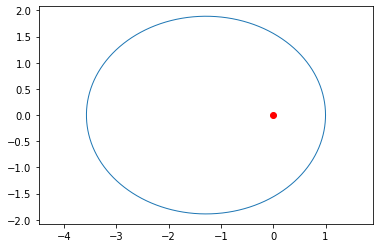

In [ ]:
#Verlet method for molecular Dynamics
'''
Sympletic: The area in phase space is preserved
Less accurate than RK4, but simple to express the dynamics
r(t+h)=r(t)+v(t)*h+(1/2)*a(t)*h**2+O(h**3)
v(t+h)=v(t)+a(t)*h+(1/2)*g(t)*h**2+O(h**3)
a(t+h)=a(t)+g(t)*h+O(h**2)
Then
(1/2)g(t)*h**2=(1/2)(a(t+h)-a(t))+O(h**3)

v(t+h)=v(t)+(h/2)*(a(t+h)+a(t))+O(h**3)

r(t+h)=2*r(t)-r(t-h)+a(t)*h**2+O(t**4)

or
v(t+h/2)=v(t)+(h/2)*a(t)
r(t+h)=r(t)+h*v(t+h/2)
v(t+h)=v(t+h/2)+(h/2)*a(t+h)
'''
#Kepler problem  r"=-1/r
import numpy as np
import matplotlib.pyplot as plt

def verlet(f,x,p,h):
  p+=0.5*h*f(x)
  x+=h*p
  p+=0.5*h*f(x)
  return x,p

def f(x):
  rinv=np.sum(x**2)**(-1.5)
  return -x*rinv

vi=1.25
x0=np.array([1,0])
p0=np.array([0,vi])

ecc=1.-vi**2
T=2.*np.pi*(1.+ecc)**(-1.5)
h=0.001
t=np.arange(0,min(T,100),h)
x=np.zeros((t.size,2))
p=np.zeros_like(x)
x[0]=x0
p[0]=p0

for i in range(t.size-1):
  x[i+1],p[i+1]=verlet(f,x[i],p[i],h)

plt.plot(x[:,0],x[:,1],lw=1)
plt.plot([0],[0],'ro')
plt.axis('equal')


In [ ]:
#Shooting method
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

g=9.81; h=0.001

def f(s,t):
  x,v=s
  return np.array([v,-g])

def height(v):
  s=np.array([0,v])
  for t in np.arange(0,10,h):
    s_next=RK4(f,s,t,h)
    s=s_next
  return s[0]

def RK4(f,x,t,h):
  k1=h*f(x,t)
  k2=h*f(x+0.5*k1,t+0.5*h)
  k3=h*f(x+0.5*k2,t+0.5*h)
  k4=h*f(x+k3,t+h)
  return x+(k1+2.*k2+2.*k3+k4)/6.

v=newton(height,0.01)
print("v=",v)


v= 49.05000000000538


E= 4.934802200552723


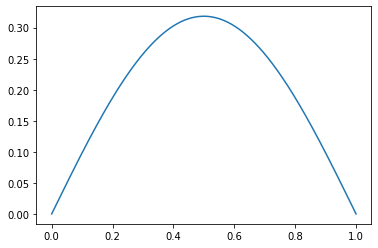

In [ ]:
#Boundary problem(eigenvalue)
'''
ds/dt=f(s);  s=(psi, phi);  f(s)=(phi, (2.*m/h**2)*(V(x)-E)*psi)
'''
import numpy as np
import matplotlib.pyplot as plt

m=1.
hbar2=1.
L=1.
N=1000
x=np.linspace(0,L,N)
s=np.zeros((N,2))
h=x[1]-x[0]

def V(x):
  return 0.

def f(s,x,E):
  psi, phi= s
  return np.array([phi,2.*m/hbar2*(V(x)-E)*psi])

def RK4(f,s,E,x,h):
  k1=h*f(s,x,E)
  k2=h*f(s+0.5*k1,x+0.5*h,E)
  k3=h*f(s+0.5*k2,x+0.5*h,E)
  k4=h*f(s+k3,x+h,E)
  return s+(k1+2.*k2+2.*k3+k4)/6.

def func(E):
  psi=0. #initial
  phi=1. #arbitrary
  s[0]=np.array([psi,phi])
  for i in range(N-1):
    s[i+1]=RK4(f,s[i],E,x[i],h)
  return s[N-1][0]

E=newton(func,1.)

print("E=",E)
plt.plot(x,s[:,0])

In [ ]:
#Finite difference method
'''
central differeces 1st derivative
(f(x+h)-f(x-h))/(2.*h)=f'(x)+O(h**2)
Error=2.*eps|f(x)|/h+(1./24.)*|f"'(x)|*h**2
Min.Error=((9./8.)[f(x)]**2*|f"'(x)|)^(1/3)~1.e-10
            with h=(24.*|(f(x)/f"'(x))|)^(1/3)~1.e-5

central differeces 2nd derivative
(f(x+h)+f(x-h)-2.*f(x))/(h**2)=f"(x)+O(h**2)
Error=4.*eps|f(x)|/h**2+(1./12.)*|f""(x)|*h**2
Min.Error=((4./3.)|f(x)f""(x)|)^(1/2)~1.e-8
            with h=(48.*|(f(x)/f""(x))|)^(1/4)~1.e-4
'''

Elapsed time =231.272074 s


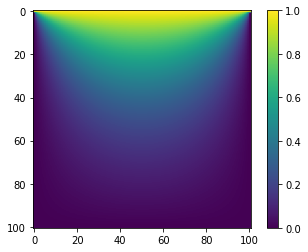

In [ ]:
#Relaxation method
'''
2D Laplace equation can be expressed by
 f(x+a,y)+f(x-a,y)+f(x,y+a)+f(x,y-a)-4.*f(x,y)=0
-Jacobi method
update "after" every iteration
Good: it can keep the symmetry, parellel
Bad: less stable,slower
  f'(x,y)=(1./4.)[f(x+a,y)+f(x-a,y)+f(x,y+a)+f(x,y-a)]
'''
import numpy as np
import matplotlib.pyplot as plt
from time import time

M=100; V=1.
target= 1.e-6
phi=np.zeros((M+1,M+1))
phi[0,:]=V
phinew=np.zeros_like(phi)
delta=1.
t_start=time()
while delta>target:
  for i in range(M+1):
    for j in range(M+1):
      if i==0 or i==M or j==0 or j==M:
        phinew[i,j]=phi[i,j]
      else:
        phinew[i,j]=0.25*(phi[i+1,j]+phi[i-1,j]
                            +phi[i,j+1]+phi[i,j-1])
  delta=np.max(np.abs(phi-phinew))
  phi, phinew=phinew,phi
t_end=time()
print("Elapsed time =%f s"%(t_end-t_start))

ax=plt.gca()
im=ax.imshow(phi)
cb=plt.colorbar(im)

In [ ]:
'''
2D Laplace equation can be expressed by
 f(x+a,y)+f(x-a,y)+f(x,y+a)+f(x,y-a)-4.*f(x,y)=0

-Gauss-Seidel method
update as soon as it's available
Good: more stable, faster, memory-saving
Bad: it does not keep the symmetry, sequential
  f(x,y)<-(1./4.)[f(x+a,y)+f(x-a,y)+f(x,y+a)+f(x,y-a)]
'''
import numpy as np
import matplotlib.pyplot as plt
from time import time

M=100; V=1.
target= 1.e-6
phi=np.zeros((M+1,M+1))
phi[0,:]=V
delta=1.
t_start=time()
while delta>target:
  delta=0.
  for ii in range(M-1):
    for jj in range(M-1):
      i=ii+1
      j=jj+1
      tmp=0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])
      delta=max(delta,abs(phi[i,j]-tmp))
      phi[i,j]=tmp
t_end=time()
print("Elapsed time =%f s"%(t_end-t_start))

ax=plt.gca()
im=ax.imshow(phi)
cb=plt.colorbar(im)

Elapsed time =127.948252 s


Elapsed time =52.908321 s


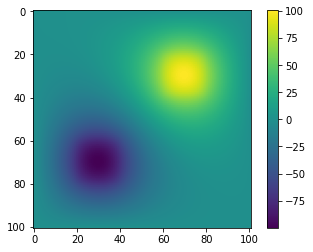

In [ ]:
'''
poisson equation
 source:-pho/epsilon
f(x,y)<-(1./4.)[f(x+a,y)+f(x-a,y)+
                f(x,y+a)+f(x,y-a)]+a**2/(4.*epsilon)
'''
import numpy as np
import matplotlib.pyplot as plt
from time import time

M=100; V=1.
target= 1.e-3

phi=np.zeros((M+1,M+1))
rho=np.zeros((M+1,M+1))
rho[60:80,20:40]=-1.
rho[20:40,60:80]=1.

phi[0,:]=V
delta=1.
t_start=time()
while delta>target:
  delta=0.
  for ii in range(M-1):
    for jj in range(M-1):
      i=ii+1
      j=jj+1
      tmp=0.25*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])+0.25*rho[i,j]
      delta=max(delta,abs(phi[i,j]-tmp))
      phi[i,j]=tmp
t_end=time()
print("Elapsed time =%f s"%(t_end-t_start))

ax=plt.gca()
im=ax.imshow(phi)
cb=plt.colorbar(im)


Elapsed time =12.193688 s


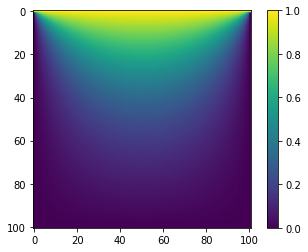

In [ ]:
#Successive Over-relaxation: Gauss Seidel
import numpy as np
import matplotlib.pyplot as plt
from time import time

M=100; V=1.
target= 1.e-6

phi=np.zeros((M+1,M+1))
phi[0,:]=V

omega=0.9
a=0.25*(1.+omega)
b=-omega

delta=1.

t_start=time()
while delta>target:
  delta=0.
  for ii in range(M-1):
    for jj in range(M-1):
      i=ii+1
      j=jj+1
      tmp=a*(phi[i+1,j]+phi[i-1,j] \
             +phi[i,j+1]+phi[i,j-1])\
             +b*phi[i,j]
      delta=max(delta,abs(phi[i,j]-tmp))
      phi[i,j]=tmp
t_end=time()
print("Elapsed time =%f s"%(t_end-t_start))

ax=plt.gca()
im=ax.imshow(phi)
cb=plt.colorbar(im)

Elapsed time =3.700920 s


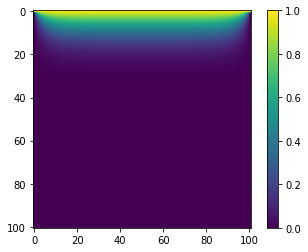

In [ ]:
#SOR:Jacobi
import numpy as np
import matplotlib.pyplot as plt
from time import time

M=100; V=1.
target= 1.e-3

phi=np.zeros((M+1,M+1))
phi[0,:]=V
phinew=np.zeros_like(phi)

delta=1.
omega=0.01   #if omega=0.1, not converge

t_start=time()
while delta>target:
  for i in range(M+1):
    for j in range(M+1):
      if i==0 or i==M or j==0 or j==M:
        phinew[i,j]=phi[i,j]
      else:
        phinew[i,j]=0.25*(phi[i+1,j]+phi[i-1,j]
                            +phi[i,j+1]+phi[i,j-1])
  phinew=(1.+omega)*phinew-omega*phi
  delta=np.max(np.abs(phi-phinew))
  phi, phinew=phinew,phi
t_end=time()
print("Elapsed time =%f s"%(t_end-t_start))

ax=plt.gca()
im=ax.imshow(phi)
cb=plt.colorbar(im)

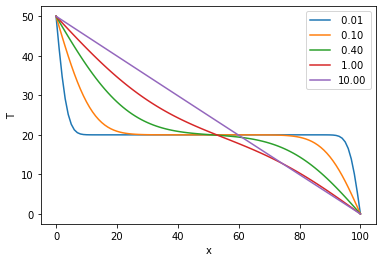

In [ ]:
#Heat equation
'''
d/dt f =D*(d/dx)**2 f
f(x,t+h)=f(x,t)+h*(D/a**2)[f(x+a,t)+f(x-a,t)-2.*f(x,t)]

von Neumann stability analysis
 f(x,t)=sum(c_k(t)*e^(i*k*x)){k}
c_k(t+h)*e^(i*k*x)=
        [1-h*(4.*D/a**2)(sin(ka/2.))**2]c(t)e^(i*k*x)
Condition:|1-h*(4.*D/a**2)(sin(ka/2.))**2|<1
          h<=a**2/(2.*D)~O(1.e-3)
'''
import numpy as np
import matplotlib.pyplot as plt
L=0.01; D=4.25e-6 #Thermal diffusivity
N=100; a=L/N      #Grid spacing
h=1.e-4           #Time step
epsilon=h/1000.

#Boundary condition
Tlo=0.   #T(x=L,t=0)
Tmid=20. #T(0<x<L,t=0)
Thi=50.  #T(x=0,t=0)

t1=0.01; t2=0.1; t3=0.4; t4=1.; t5=10.
tend=t5+epsilon

T=np.zeros(N+1,float)
T[0]=Thi
T[N]=Tlo
T[1:N]=Tmid
Tp=np.zeros(N+1,float)
Tp[0]=Thi
Tp[N]=Tlo

t=0.
c=h*D/(a**2)
while t<tend:
  for i in range(1,N):
    Tp[i]=T[i]+c*(T[i+1]+T[i-1]-2.*T[i])
  T,Tp=Tp,T  #deep copy
  t+=h
  if abs(t-t1)<epsilon:
    plt.plot(T,label='%5.2f'%t1)
  if abs(t-t2)<epsilon:
    plt.plot(T,label='%5.2f'%t2)
  if abs(t-t3)<epsilon:
    plt.plot(T,label='%5.2f'%t3)
  if abs(t-t4)<epsilon:
    plt.plot(T,label='%5.2f'%t4)
  if abs(t-t5)<epsilon:
    plt.plot(T,label='%5.2f'%t5)

plt.xlabel("x")
plt.ylabel("T")
plt.legend()

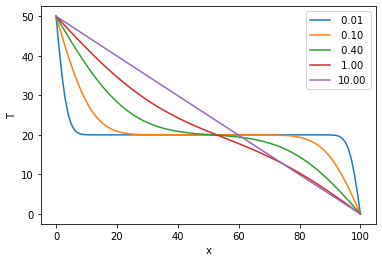

In [ ]:
#Heat equation:Crank-Nicolson method
'''
df/dt=D*(d/dx)^2f

df/dt|(x,t+h/2.)=(f(x,t+h)-f(x,t))/h + O(h**2)
(d/dx)^2f|(x,t+h/2.)=
    1./2.*[(1./a**2)[f(x+a,t+h)+f(x-a,t+h)-2.*f(x,t+h)]
            +(1./a**2)[f(x+a,t)+f(x-a,t)-2.*f(x,t)]] + O(h**2)

Let x=x0+a*i;  t=t0+h*j;  q=(h/a**2)*D
-f_(i-1,j+1)+(2./q+2.)*f_(i,j+1)-f_(i+1,j+1)
            =f_(i-1,j)+(2./q-2.)f_(i,j)+f_(i+1,j)

Thomas algorithm is efficient for a tridiagonal matrix

Stability condition:
      [1-2.*(sin(k*a/2.))**2]/[1+2.*(sin(k*a/2.))**2]<=1
        True for all h and a
stable
'''
import numpy as np
import matplotlib.pyplot as plt
L=0.01; D=4.25e-6 #Thermal diffusivity
N=100; a=L/N      #Grid spacing
h=1.e-4           #Time step
epsilon=h/1000.

#Boundary condition
Tlo=0.   #T(x=L,t=0)
Tmid=20. #T(0<x<L,t=0)
Thi=50.  #T(x=0,t=0)

t1=0.01; t2=0.1; t3=0.4; t4=1.; t5=10.
tend=t5+epsilon

T=np.zeros(N+1,float)
T[0]=Thi
T[N]=Tlo
T[1:N]=Tmid
Tp=np.zeros(N+1,float)
Tp[0]=Thi
Tp[N]=Tlo

LHS=2.+2.*a*a/(h*D)
RHS=-2.+2.*a*a/(h*D)

M=np.zeros((N-1,N-1))
np.fill_diagonal(M,LHS)
np.fill_diagonal(M[1:,:],-1)
np.fill_diagonal(M[:,1:],-1)

t=0.
while t<tend:
  Tp[1:-1]=T[:-2]+RHS*T[1:-1]+T[2:]
  Tp[1]+=T[0]
  Tp[-2]+=T[-1]
  Tp[1:-1]=np.linalg.solve(M,Tp[1:-1])
  T,Tp=Tp,T
  t+=h
  if abs(t-t1)<epsilon:
    plt.plot(T,label='%5.2f'%t1)
  if abs(t-t2)<epsilon:
    plt.plot(T,label='%5.2f'%t2)
  if abs(t-t3)<epsilon:
    plt.plot(T,label='%5.2f'%t3)
  if abs(t-t4)<epsilon:
    plt.plot(T,label='%5.2f'%t4)
  if abs(t-t5)<epsilon:
    plt.plot(T,label='%5.2f'%t5)

plt.xlabel("x")
plt.ylabel("T")
plt.legend()

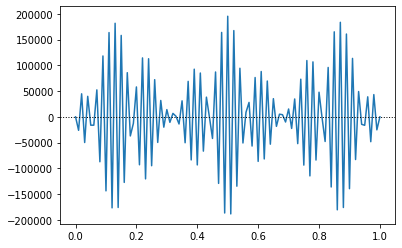

In [ ]:
#Wave equation
import numpy as np
import matplotlib.pyplot as plt

L=1.; d=0.1; C=1.; sgm=0.3; v=100.
N=100; a=L/N; h=1.e-6; eta=h*(v/a)**2
#initial condition
x=np.arange(0.,L+0.001*a,a)
psi=C*x*(L-x)/(L*L)*np.exp(-0.5*(x-d)**2/sgm**2)
psi_new=np.zeros_like(psi)
phi=np.zeros_like(psi)
phi_new=np.zeros_like(psi)

t=0
tmax=0.2+0.001*h  #2ms: try to increase it

while t<tmax:
  phi_new=phi+h*psi
  psi_new[1:-1]=psi[1:-1] +eta*(phi[2:]+phi[:-2]-2.*phi[1:-1])
  phi,phi_new=phi_new,phi
  psi,psi_new=psi_new,psi
  t+=h
plt.plot(x,phi)
plt.axhline(c='k',ls=':',lw=1)



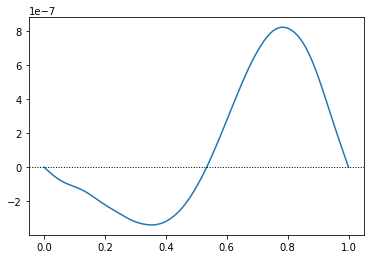

In [ ]:
#Wave equation:Crank-Nicolson method
import numpy as np
import matplotlib.pyplot as plt

L=1.; d=0.1; C=1.; sgm=0.3; v=100.
N=100; a=L/N; h=1.e-6; eta=h*(v/a)**2
Leven=np.array([0,0,1,-0.5*h,0])
Lodd=np.array([-0.5*eta,0,eta,1,-0.5*eta])
Reven=np.array([0,0,1,0.5*h,0])
Rodd=np.array([0.5*eta,0,-eta,1,0.5*eta])

A=np.zeros((2*N-2,2*N-2))
B=np.zeros((2*N-2,2*N-2))

index=np.arange(1,N-2)
A[0,:3]=Leven[2:]
A[1,:3]=Lodd[2:]
A[-2,-4:]=Leven[:4]
A[-1,-4:]=Lodd[:4]
B[0,:3]=Reven[2:]
B[1,:3]=Rodd[2:]
B[-2,-4:]=Reven[:4]
B[-1,-4:]=Rodd[:4]
for i in index:
  A[2*i,2*i-2:2*i+3]=Leven
  A[2*i+1,2*i-2:2*i+3]=Lodd
  B[2*i,2*i-2:2*i+3]=Reven
  B[2*i+1,2*i-2:2*i+3]=Rodd

x=np.arange(0.,L+0.001*a,a)
psi=C*x*(L-x)/(L*L)*np.exp(-0.5*(x-d)**2/sgm**2)
psi_new=np.zeros_like(psi)
pv=np.zeros(2*N-2)
pv[1::2]=psi[1:-1]

t=0
tmax=0.05+0.001*h  #2ms: try to increase it

while t<tmax:
  pv=np.dot(B,pv)
  pv=np.linalg.solve(A,pv)
  t+=h
phi[1:-1]=pv[0::2]
plt.plot(x,phi)
plt.axhline(c='k',ls=':',lw=1)